In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dropout


import cv2
import numpy as np
import sklearn

Using TensorFlow backend.
C:\Users\User\Anaconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
samples = []



with open('.\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

In [3]:
from sklearn.utils import shuffle


def generator(samples, batch_size=32):
    num_samples = len(samples)
    count = 0
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        count = count + 1
        
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
            
           
            for batch_sample in batch_samples:
                #name = './IMG/'+batch_sample[0].split('/')[-1]
                name = batch_sample[0]
                #.split('\\')[-1]
                #source_path = line[0]
                #filename = source_path.split('\\')[-1]
                
                #print(batch_sample[0])
                #print (count)
                #name = '\IMG\\' + filename
                
                #C:\CarSim\data_1\IMG\\'
                
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                #if count == 1:
                    #plt.imshow(center_image)
                    #print(center_angle)
                
                
                images.append(center_image)
                angles.append(center_angle)
                images.append(cv2.flip(center_image, 1)) # augmented image
                angles.append(center_angle*-1.0) # augmentd angle

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            #if offset == 0:
             #   plt.imshow(images[0])
            #yield sklearn.utils.shuffle(X_train, y_train)
            yield shuffle(X_train,y_train)
            


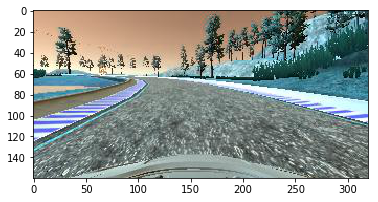

In [4]:
text = 'C:\\Users\\User\Desktop\data_1\IMG\center_2018_05_27_17_34_38_127.jpg'

center_image1 = cv2.imread(text)
plt.imshow(center_image1)

In [5]:
            
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)

#print(len(train_generator))
validation_generator = generator(validation_samples, batch_size=32)


#print(len(train_generator))

In [6]:
#ch, row, col = 3, 80, 320  # Trimmed image format

model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1.0, input_shape=(160,320,3)))
model.add(Cropping2D(cropping = ((70,25),(0,0)), input_shape = (3,160,320)))
model.add(Convolution2D(24, 5, 5, subsample = (2,2), activation="relu"))
model.add(Dropout(0.5))
model.add(Convolution2D(36, 5, 5, subsample = (2,2), activation="relu"))
model.add(Dropout(0.5))
model.add(Convolution2D(48, 5, 5, subsample = (2,2), activation="relu"))
model.add(Dropout(0.5))
model.add(Convolution2D(64, 3, 3, activation="relu"))
model.add(Convolution2D(64, 3, 3, activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

#model.compile(loss='mse', optimizer='adam')
#model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch = 5)

model.compile(loss='mse', optimizer='adam')
history_object = model.fit_generator(train_generator, samples_per_epoch= len(train_samples), validation_data=validation_generator,nb_val_samples=len(validation_samples), nb_epoch=15)

#history_object = model.fit_generator(train_generator, steps_per_epoch= len(train_samples),validation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)


model.save('model.h5')
          
"""
If the above code throw exceptions, try 
model.fit_generator(train_generator, steps_per_epoch= len(train_samples),
validation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)
"""

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/15
10112/10144 [============================>.] - ETA: 0s - loss: 0.0348

C:\Users\User\Anaconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


10176/10144 [==============================] - 34s - loss: 0.0348 - val_loss: 0.0335
Epoch 2/15
10176/10144 [==============================] - 26s - loss: 0.0313 - val_loss: 0.0274
Epoch 3/15
10176/10144 [==============================] - 12s - loss: 0.0273 - val_loss: 0.0309
Epoch 4/15
10176/10144 [==============================] - 13s - loss: 0.0297 - val_loss: 0.0258
Epoch 5/15
10176/10144 [==============================] - 12s - loss: 0.0258 - val_loss: 0.0305
Epoch 6/15
10176/10144 [==============================] - 13s - loss: 0.0283 - val_loss: 0.0241
Epoch 7/15
10176/10144 [==============================] - 12s - loss: 0.0255 - val_loss: 0.0292
Epoch 8/15
10176/10144 [==============================] - 12s - loss: 0.0279 - val_loss: 0.0256
Epoch 9/15
10176/10144 [==============================] - 13s - loss: 0.0250 - val_loss: 0.0277
Epoch 10/15
10176/10144 [==============================] - 13s - loss: 0.0272 - val_loss: 0.0233
Epoch 11/15
10176/10144 [=========================

'\nIf the above code throw exceptions, try \nmodel.fit_generator(train_generator, steps_per_epoch= len(train_samples),\nvalidation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)\n'

dict_keys(['val_loss', 'loss'])


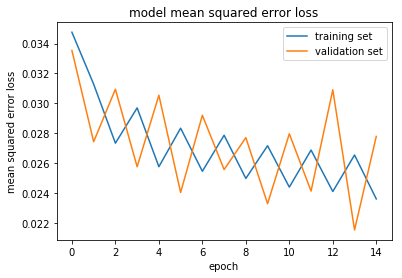

In [7]:
from keras.models import Model
import matplotlib.pyplot as plt

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()